# Overview

matplotlib is a python 2D plotting library built on the top of the basic Python language and Numpy.
More about matplotlib can be found in its [documentation](http://matplotlib.org/contents.html).

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Here is the [documentation](http://seaborn.pydata.org/index.html).

To display the graph inside IPython notebook, we need to run the following line of code.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

For today's lecture, we will use the IMDB dataset scraped by Sun Chuan, who is one of our graduates from Bootcamp 6.

He also uploaded the dataset to Kaggle so you can check it out [here](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset). Let's load the data first.

In [170]:
df = pd.read_csv('movie_metadata.csv')

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


You might see those `...` since there are too many columns there. We want to get the whole idea how does the dataset look like. You could check the output of `df.columns`. It is a little bit better.

In [5]:
df.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

We can tell pandas to display a larger number of columns without truncating them

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [8]:
df.shape

(5043, 28)

Describe will exclude the missing value by default.

In [11]:
df.describe(include = 'all') # include = 'all' adds the cotagorical variables that are excluded by default

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,5043,5.043000e+03,5043.000000,5020,5030.000000,4890,5043,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,4917,NaN,NaN,3521,NaN,4760,4919,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,Halloween,NaN,NaN,Steve Coogan,NaN,based on novel,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,3,NaN,NaN,8,NaN,4,3,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,NaN,8.366816e+04,9699.063851,NaN,1.371173,NaN,NaN,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,NaN,1.384853e+05,18163.799124,NaN,2.013576,NaN,NaN,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,NaN,5.000000e+00,0.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,NaN,8.593500e+03,1411.000000,NaN,0.000000,NaN,NaN,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,NaN,3.435900e+04,3090.000000,NaN,1.000000,NaN,NaN,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,NaN,9.630900e+04,13756.500000,NaN,2.000000,NaN,NaN,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


In [10]:
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Korean           8
Portuguese       8
Arabic           5
Swedish          5
Hebrew           5
Danish           5
Persian          4
Dutch            4
Polish           4
Norwegian        4
Thai             3
Chinese          3
None             2
Zulu             2
Aboriginal       2
Icelandic        2
Romanian         2
Dari             2
Indonesian       2
Urdu             1
Czech            1
Filipino         1
Tamil            1
Slovenian        1
Swahili          1
Aramaic          1
Greek            1
Hungarian        1
Bosnian          1
Kazakh           1
Panjabi          1
Kannada          1
Mongolian        1
Dzongkha         1
Vietnamese       1
Maya             1
Telugu           1
Name: language, dtype: int64

# Histogram

(array([   16.,    38.,   102.,   222.,   579.,  1158.,  1515.,  1085.,
          307.,    21.]),
 array([ 1.6 ,  2.39,  3.18,  3.97,  4.76,  5.55,  6.34,  7.13,  7.92,
         8.71,  9.5 ]),
 <a list of 10 Patch objects>)

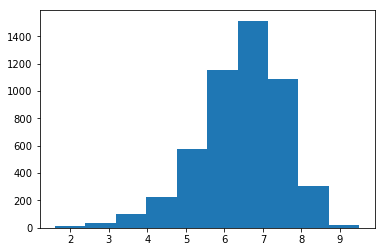

In [12]:
plt.hist(df['imdb_score'])

Explore some of the available parameters when you move your cursor inside the function parentheses and press **shift+tab**

For example, we can change the color and the number of bins. For color, you can simply type `"blue"` or `"b"` for short. At the same time, it accepts hex color code, which you can pick a color from this [website](http://www.color-hex.com/) and paste the hexadecimal code.

(array([   5.,   11.,   12.,   26.,   51.,   51.,   95.,  127.,  217.,
         362.,  497.,  661.,  795.,  720.,  666.,  419.,  226.,   81.,
          18.,    3.]),
 array([ 1.6  ,  1.995,  2.39 ,  2.785,  3.18 ,  3.575,  3.97 ,  4.365,
         4.76 ,  5.155,  5.55 ,  5.945,  6.34 ,  6.735,  7.13 ,  7.525,
         7.92 ,  8.315,  8.71 ,  9.105,  9.5  ]),
 <a list of 20 Patch objects>)

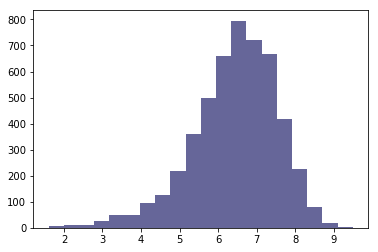

In [13]:
plt.hist(df['imdb_score'], bins=20, color="#666699")

### Exercise 1

- Create a histogram of the budget column. Did you encounter any error? See whether you can fix it by following this [Stack Overflow Link](http://stackoverflow.com/q/20656663)

- How does the graph look? Is there anyway to improve this?
What does x-axis stand for? 
- All the code in the same cell will contribute to the same plot. Similiar to adding different layers in ggplot2

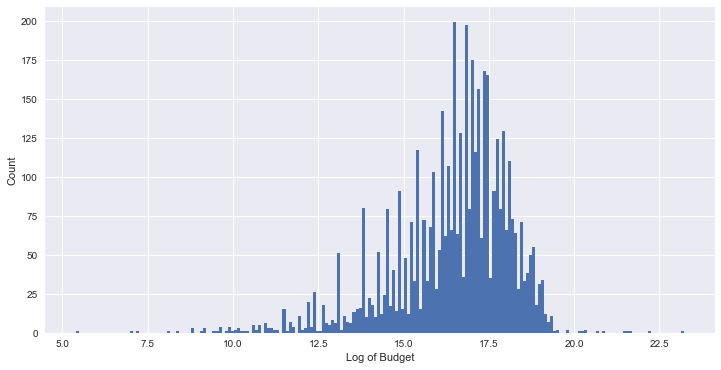

In [55]:
#### Your code here
plt.figure(figsize=(12,6)) # This line changes the size of the plot. The width and height are in inches.
plt.hist(np.log(df['budget'].dropna()), bins=200)
plt.xlabel('Log of Budget')
plt.ylabel('Count')


- Pandas dataframe also provides plotting function. It is calling the matplotlib library behind the scenes.
- You can check all the available plots from the documenation [here](http://pandas.pydata.org/pandas-docs/version/0.19.2/visualization.html#visualization)
- To make the plot looks nicer, we can import the seaborn package here.

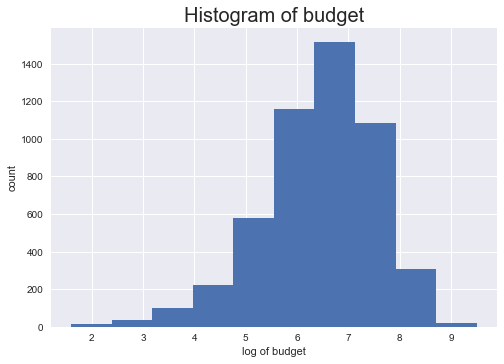

In [57]:
import seaborn as sns
df['imdb_score'].plot.hist()
plt.xlabel('log of budget')
plt.ylabel('count')
plt.title('Histogram of budget', fontsize=20)

# Scatterplot
Scatterplots are useful for bivariate analysis. We can check the relationship between two columns.
Suppose we want to figure out whether there is a relationship between the gross income and the budget.

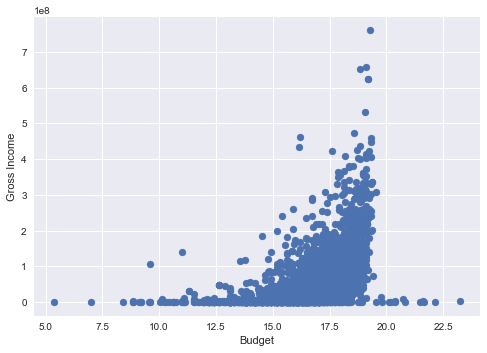

In [58]:
plt.scatter(np.log(df['budget']), df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross Income')


We can see here there are some outliers there so it makes the graph less useful. Let's try to remove them from our dataframe using the apply function.

In [79]:
scatter_df = df[['gross', 'budget']]
scatter_df = scatter_df[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

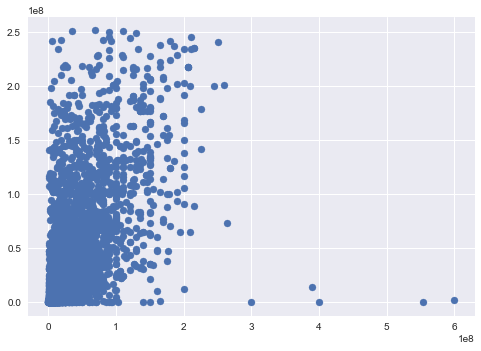

In [80]:
plt.scatter(scatter_df['budget'], scatter_df['gross'])

Sometimes it is interesting to take a look at those outliers. In the previous example, we remove the outlier, we can simply use the ~ symbol for the other way around. We can merge the outlier dataframe with the original one to get other features and sort by the amount of budget in a descending order.

In [81]:
outliers = df[['gross', 'budget']].dropna()
outliers = outliers[~outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
outliers.merge(df)[['gross', 'budget', 'movie_title']].sort_values(by='budget', ascending=False)

,gross,budget,movie_title
98,2201412.0,1.221550e+10,The Host
103,211667.0,4.200000e+09,Lady Vengeance
99,195888.0,2.500000e+09,Fateless
95,2298191.0,2.400000e+09,Princess Mononoke
96,410388.0,2.127520e+09,Steamboy
102,439162.0,1.100000e+09,Akira
104,10037390.0,1.000000e+09,Godzilla 2000
1,309404152.0,3.000000e+08,Pirates of the Caribbean: At World's End
6,336530303.0,2.580000e+08,Spider-Man 3
5,336530303.0,2.580000e+08,Spider-Man 3


In [1]:
score_df = df[['gross', 'imdb_score']]
#score_df = score_df[score_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

NameError: name 'df' is not defined

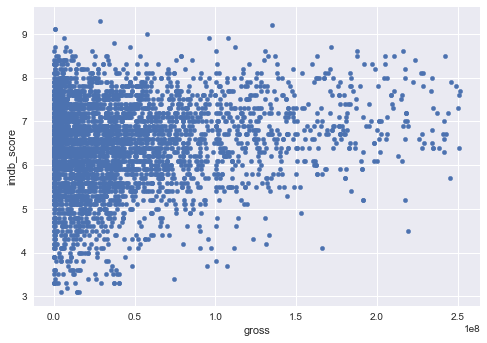

In [85]:
score_df.plot.scatter('gross', 'imdb_score')

### Exercise 2
- How is gross income related to director Facebook likes? 
- How is the imdb_score related to num_critic_for_reviews?

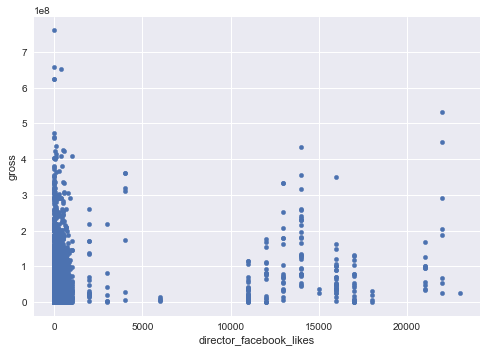

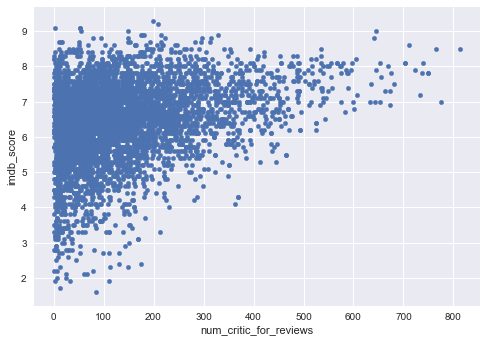

In [95]:
#### Your code here
gross_likes = df[[ 'director_facebook_likes', 'gross',]]
#gross_likes = gross_likes[gross_likes.apply(lambda x: (x - x.mean())/x.std() < 3)]
gross_likes.plot.scatter('director_facebook_likes', 'gross')

imdb_sc_num_cr_rev = df[['num_critic_for_reviews', 'imdb_score']]
#imdb_sc_num_cr_rev = imdb_sc_num_cr_rev[imdb_sc_num_cr_rev.apply(lambda x: (x - x.mean())/x.std() < 3)]
imdb_sc_num_cr_rev.plot.scatter('num_critic_for_reviews', 'imdb_score')

# Barplot

Barplot is often used to visualize the amount of each class in a categorical feature. It shows the difference between factors.

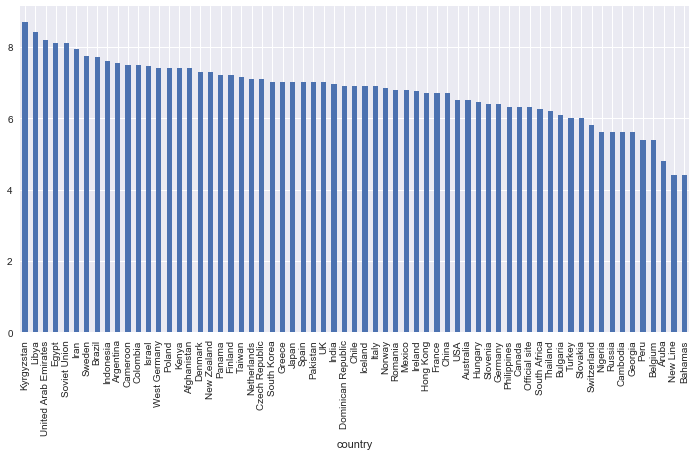

In [113]:
plt.figure(figsize=(12,6))
df.groupby('country')['imdb_score'].median().sort_values(ascending=False).plot.bar()
#df.groupby('country')['imdb_score'].agg('median').sort_values(ascending=False).plot.bar()

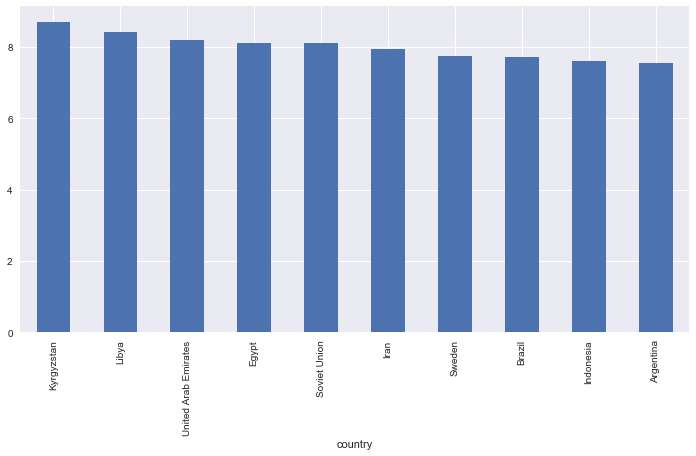

In [114]:
plt.figure(figsize=(12,6))
df.groupby('country')['imdb_score'].median().sort_values(ascending=False).head(10).plot.bar()

/Users/gafergus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,budget
title_year,
2007,4.104793e+07
2008,4.503644e+07
2009,4.169074e+07
2010,4.873580e+07
2011,4.471375e+07


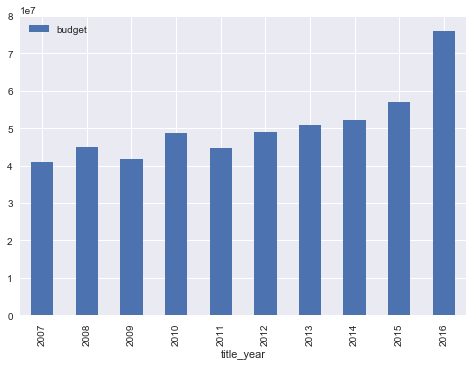

In [147]:
df_clean = df.dropna()
df_clean['title_year'] = df_clean['title_year'].astype(np.int16)

bar_df = df_clean.groupby('title_year')[['budget']].mean().tail(10)
#bar_df['title_year'] = bar_df['title_year'].astype(np.int16)
bar_df.plot.bar()
bar_df.head()

### Genre
- Definitely we want to check out how the features changes across different genres. However, things get a little bit tricky here. We saw that genres are separated by the `|` symbol. At the same time, each movie might have more than one genre. So we may have to duplicate the row by multiple times
- Suppose we want to check out the imdb distribution among all the genres.

In [126]:
df_clean = df[['genres', 'budget', 'gross', 'title_year', 'imdb_score']].dropna()
df_genre = pd.DataFrame(columns = ['genre', 'budget', 'gross', 'year', 'imdb_score'])

def genreRemap(row):
    global df_genre
    d = {}
    genres = row['genres'].split('|')
    n = len(genres)
    d['genre'] = genres
    d['budget'] = [row['budget']] * n
    d['gross'] = [row['gross']] * n
    d['year'] = [row['title_year']] * n
    d['imdb_score'] = [row['imdb_score']] * n

    df_genre = df_genre.append(pd.DataFrame(d), ignore_index = True)

df_clean.apply(genreRemap, axis = 1)
df_genre['year'] = df_genre['year'].astype(np.int16)

In [123]:
df_genre.head(10)

,budget,genre,gross,imdb_score,year
0,237000000.0,Action,760505847.0,7.9,2009
1,237000000.0,Adventure,760505847.0,7.9,2009
2,237000000.0,Fantasy,760505847.0,7.9,2009
3,237000000.0,Sci-Fi,760505847.0,7.9,2009
4,300000000.0,Action,309404152.0,7.1,2007
5,300000000.0,Adventure,309404152.0,7.1,2007
6,300000000.0,Fantasy,309404152.0,7.1,2007
7,245000000.0,Action,200074175.0,6.8,2015
8,245000000.0,Adventure,200074175.0,6.8,2015
9,245000000.0,Thriller,200074175.0,6.8,2015


All right, we get exactly what we want. Next we can group by the genre column and perform different analysis.
First, let's check out the imdb score across different genre.

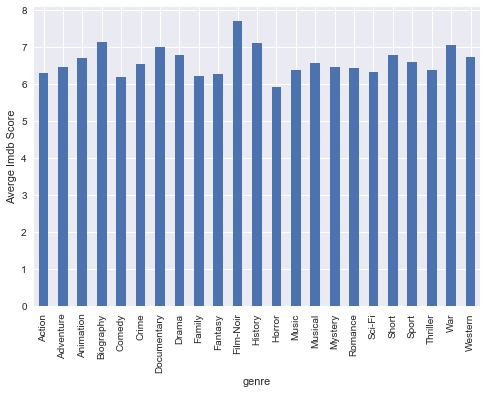

In [127]:
df_genre.groupby('genre')['imdb_score'].mean().plot.bar()
plt.ylabel('Averge Imdb Score')

### Exercise 3 
- Which genre has the highest mean budget?
- When the number of bars becomes larger, it is a good idea to plot it horizitionally. See whether you can find the function from documentation or use the tab to see available functions.

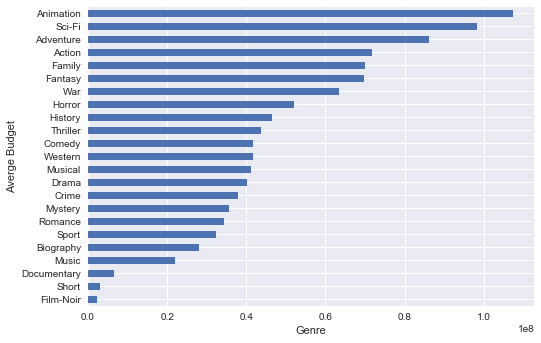

In [135]:
#### Your code here
df_genre.groupby('genre')['budget'].mean().sort_values().plot.barh()
plt.ylabel('Averge Budget')
plt.xlabel('Genre')


# Boxplot
- A boxplot is another way to visualize the distribution of a numeric feature. Let Q1, Q2 and Q3 represent the 25%, 50% and 75% quantile, respectively.
- A Bbxplot is made of five quantiles: Q1−1.5(Q3−Q1), Q1, Q2, Q3, and Q3+1. 5(Q3−Q1). It can be made by function boxplot.

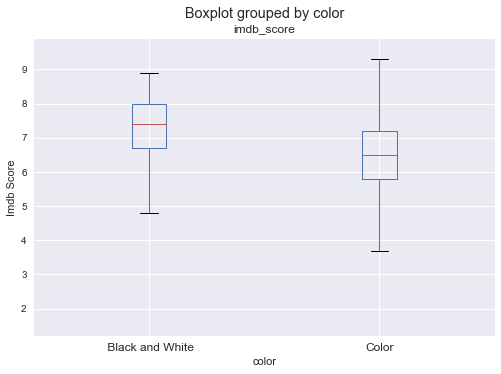

In [131]:
df_score = df[['color', 'imdb_score']].dropna()
df_score.boxplot(by='color', column='imdb_score')
plt.ylabel('Imdb Score')

### Exercise 4
What is the duration distribution for different kinds of posters?

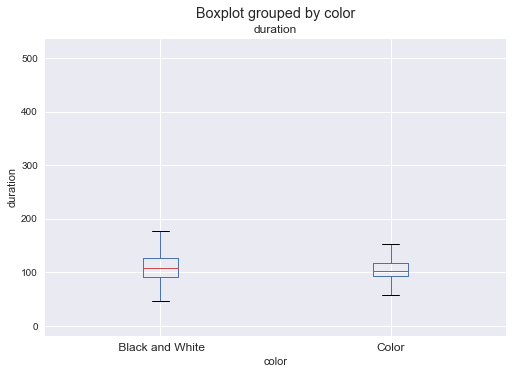

In [139]:
#### Your code here
df_score = df[['duration', 'color']].dropna()
df_score.boxplot(by='color', column='duration')
plt.ylabel('duration')

# Seaborn

In [141]:
import seaborn as sns

We can of course visualize the distribution of imdb score with histogram. However, seaborn provides a nice function that smooths out the histogram to estimate the distribution.

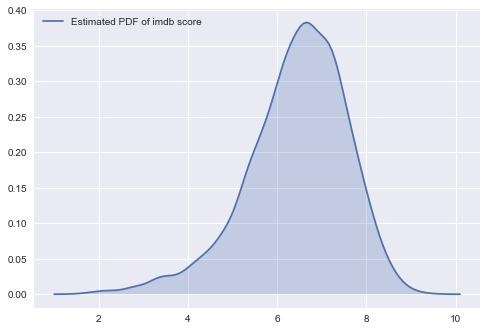

In [140]:
sns.kdeplot(df['imdb_score'], shade=True, label='Estimated PDF of imdb score')

It is possible to combine histogram and the distribution estimate plot:

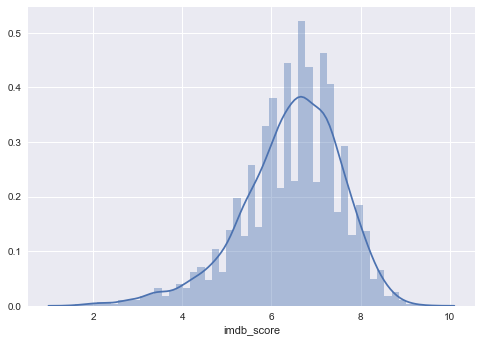

In [142]:
sns.distplot(df['imdb_score'])

The joinplot() function combines histogram and scatter plot.

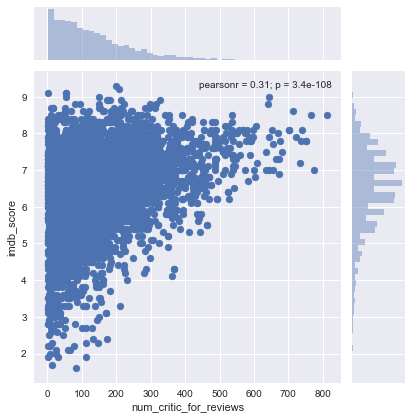

In [145]:
sns.jointplot(df['num_critic_for_reviews'], df['imdb_score'])

Below we see "pearsonr=0.031" which indicates the pearson correlation of these two variables. However, we also see the p value is pretty small, which indicates that there is a significant linear relation between the two variables.

We may also visualize the distribution of multiple features by using boxplot:

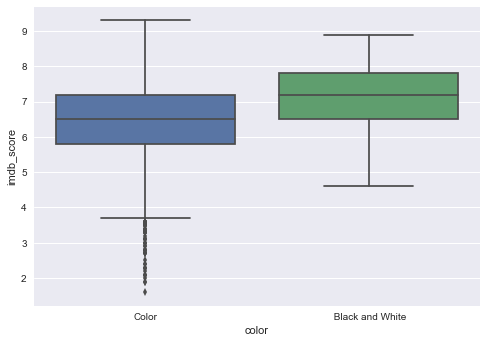

In [148]:
sns.boxplot(x='color', y='imdb_score', data=df_clean)

### Advanced plots
Seaborn also provides another famous sample dataset:

In [149]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


This is a famous dataset record the information of people of different sex, being a smoker or not, visiting at different day or for different meal, the size of parties they joined, and the tip and the total bill they pay.

To visualize the relation between total_bill and tip, of course we can use scatter plot. However, seaborn allows fitting with linear model as well.

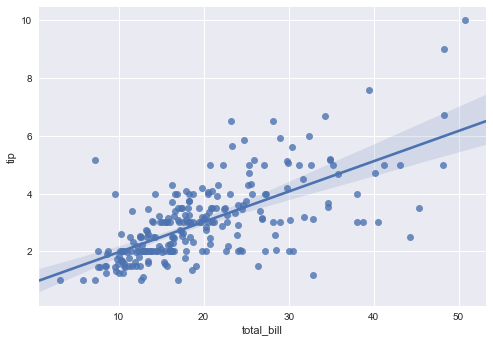

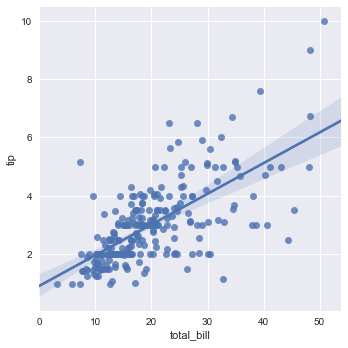

In [190]:
sns.regplot("total_bill", "tip", tips)
sns.lmplot("total_bill", "tip", tips)

We can further split the data into "Male" and "Female" parts and visualize them.

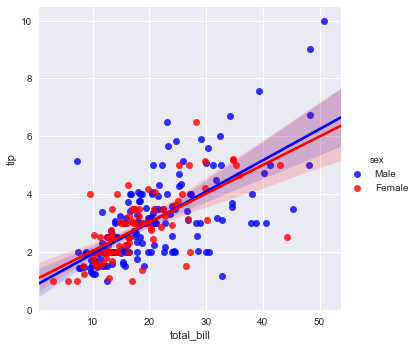

In [166]:
#sns.lmplot("total_bill", "tip", tips, hue="sex", palette="Blues")
sns.lmplot("total_bill", "tip", tips, hue="sex", palette={'Male':'b', 'Female':'r'})

Here we used:
- hue indicates according to which column we group our data.
- palette simply specifies the color we want to use.

We often need to compare the same kind of plot for different features. Functions for faceting comes in handy.

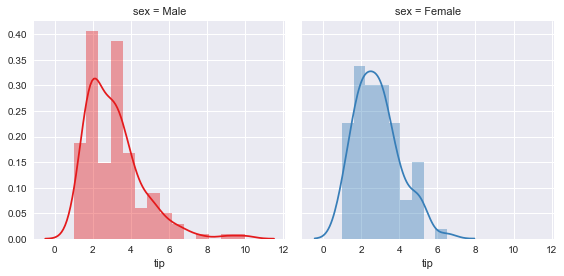

In [152]:
SexGrid = sns.FacetGrid(tips, col='sex', hue="sex", palette="Set1", size=4)
SexGrid.map(sns.distplot, "tip")

Within the function FacetGrid(), hue indicates sketching a separate plot for each sex; col specifies that each plot is placed in a new column; palette specifies the colors. Then we use .map() method to specify the type of the plot and the feature we want to visualize.

Facet can be used to differentiate multiple factors as well.

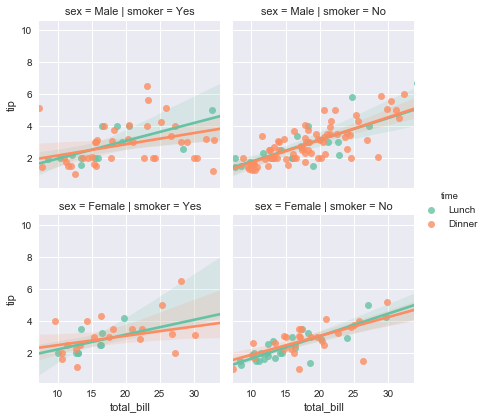

In [153]:
tipsGrid = sns.FacetGrid(tips, row='sex', col='smoker',\
                               hue='time', palette="Set2")
tipsGrid.map(sns.regplot, 'total_bill', 'tip')
tipsGrid.add_legend()

### Exercise 5
Use FacetGrid to compare the distribution of imdb score for different poster color.

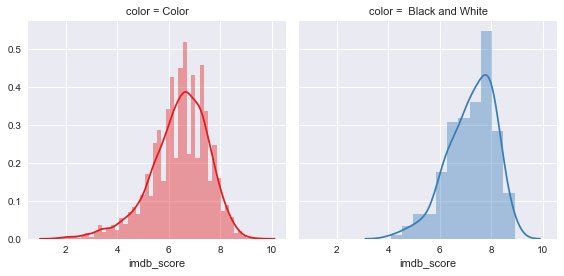

In [185]:
#### Your code here
df_score = df[['color', 'imdb_score']].dropna()
imdbGrid = sns.FacetGrid(df_score, col='color', hue='color', palette="Set1", size=4)
imdbGrid.map(sns.distplot, "imdb_score")

The function FacetGrid help you explore the specific variables conditioned on different levels. Function PairGrid is useful to explore the relationships between pairs of variables.

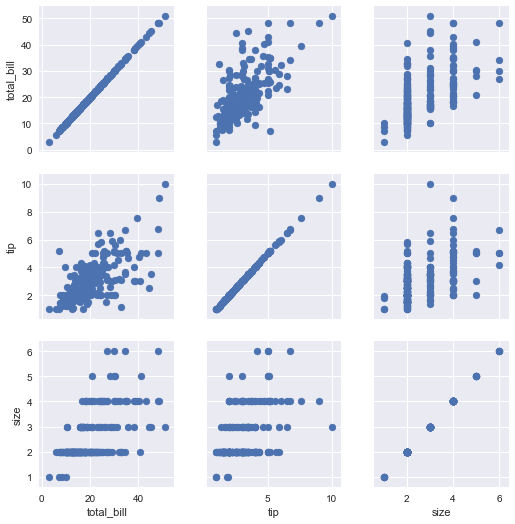

In [186]:
tipGrid = sns.PairGrid(tips)
tipGrid.map(plt.scatter)

In [187]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


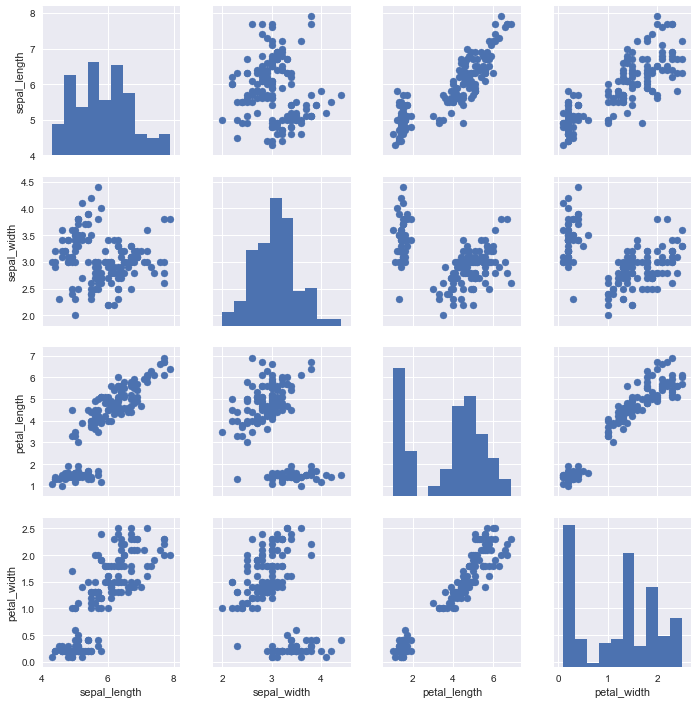

In [188]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

Some examples with different type of plot and colors.

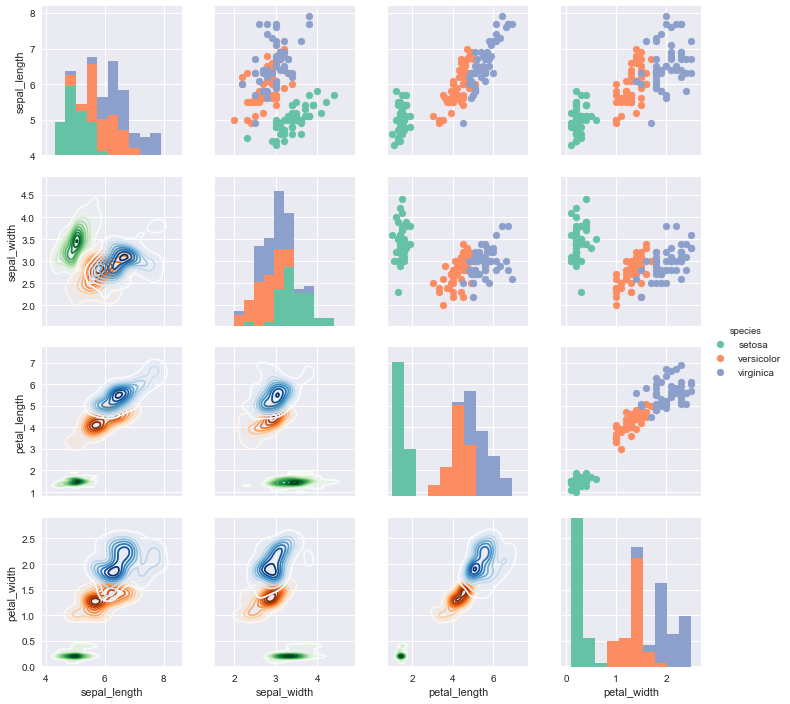

In [191]:
g = sns.PairGrid(iris, hue = 'species', palette='Set2',\
           hue_kws={'cmap':['Greens','Oranges','Blues']})
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()

# Solutions

**Exercise 1**

In [ ]:
plt.hist(np.log(df['budget'].dropna()), color="#666699")
plt.xlabel('log of budget')
plt.ylabel('count')
plt.title('Histogram of budget', fontsize=20)

**Exercsie 2**

In [ ]:
gross_df = df[['director_facebook_likes', 'gross']].dropna()
gross_df.plot.scatter('director_facebook_likes', 'gross')

In [ ]:
critic_df = df[['num_critic_for_reviews', 'imdb_score']].dropna()
critic_df.plot.scatter('num_critic_for_reviews', 'imdb_score')

**Exercise 3**

In [ ]:
df_genre.groupby('genre')['budget'].mean().sort_values().plot.barh()

**Exercise 4**

In [ ]:
df_dur = df[['color', 'duration']].dropna()
df_dur.boxplot(by='color', column='duration')
plt.ylabel('Length of Duration')

**Exercsie 5**

In [ ]:
g = sns.FacetGrid(data=df, col='color', hue='color', palette='Set1', size=4)
g.map(sns.distplot, 'imdb_score')